In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [2]:
data= pd.read_csv('Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
data.shape

(545, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

### EDA

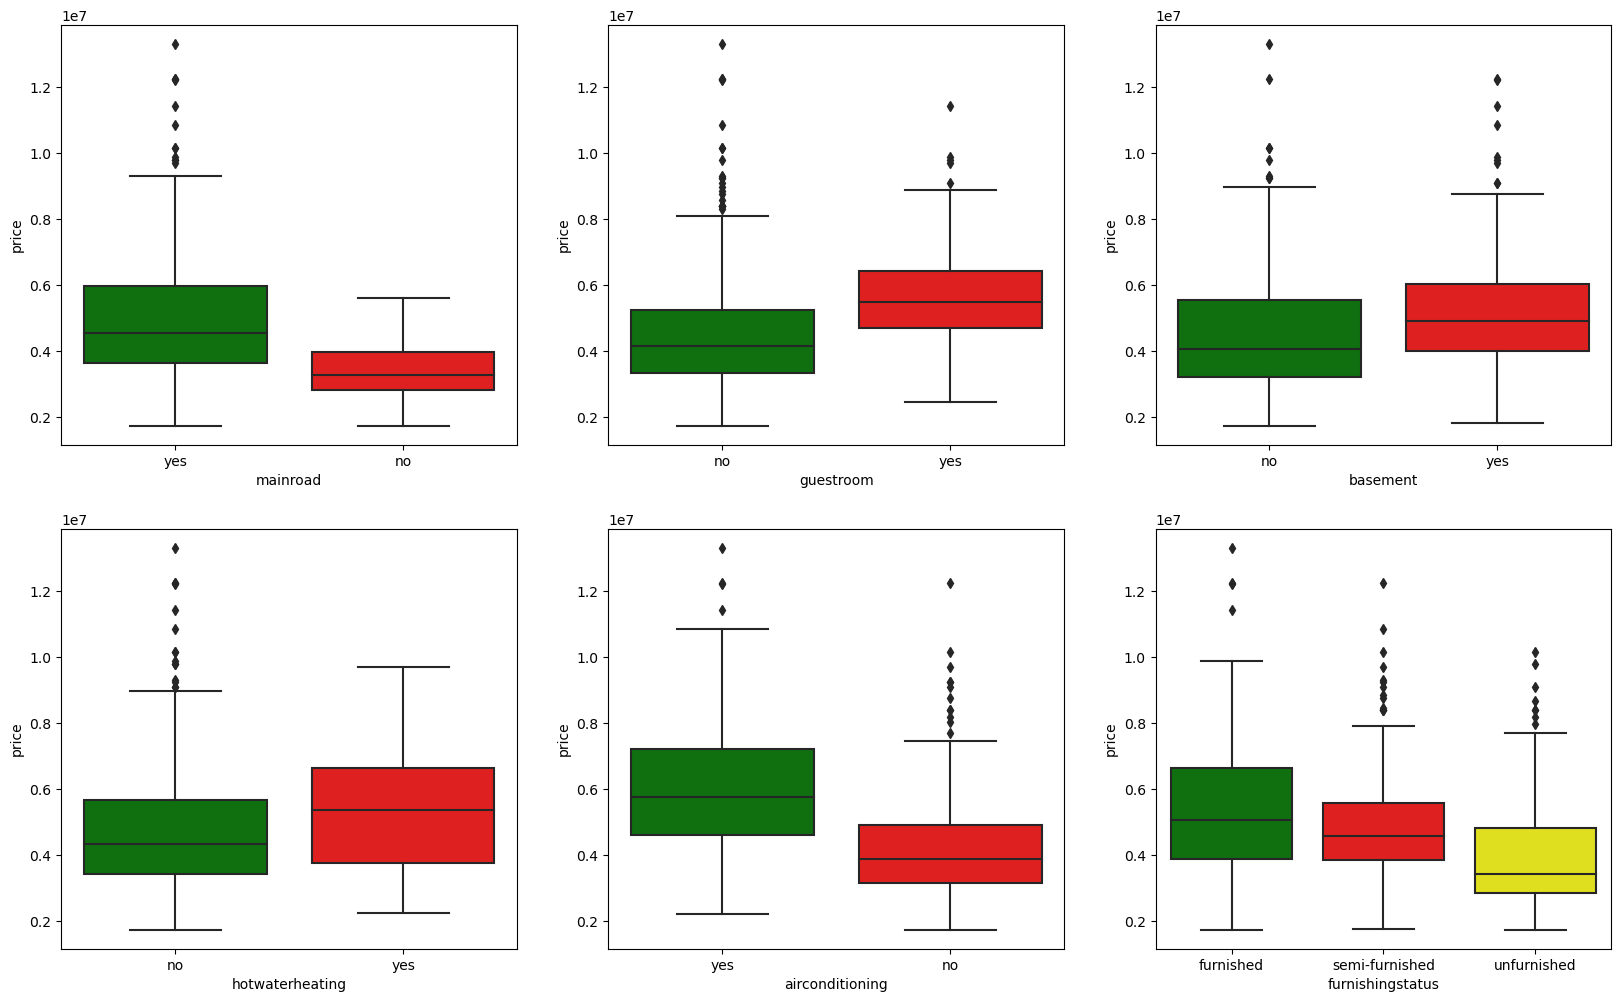

In [7]:
# Boxplot for "Price" column to check outliers with hue as categorical columns
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = data, palette=['green', 'red'])
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = data, palette=['green', 'red'])
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = data, palette=['green', 'red'])
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = data, palette=['green', 'red'])
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = data, palette=['green', 'red'])
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = data, palette=['green', 'red', 'yellow'])
plt.show()

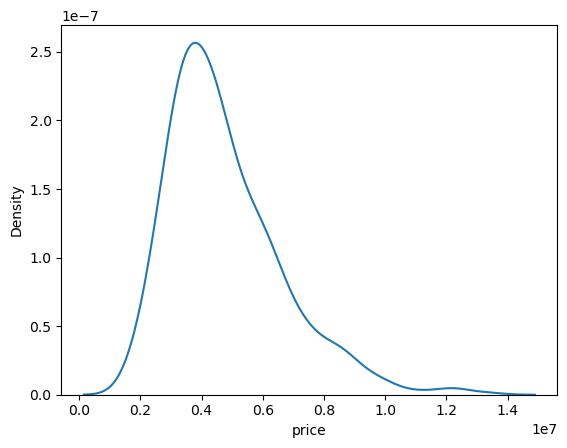

In [8]:
# kde plot to check skewness
sns.kdeplot(data['price'])
plt.show()

In [9]:
# Removing Ouliers using IQR method
q3=data['price'].quantile(0.75)
q1=data['price'].quantile(0.25)
iqr = q3-q1
upper = q3 + 1.5*iqr
lower = q3 - 1.5*iqr
data['price'].clip(lower,upper,inplace=True)

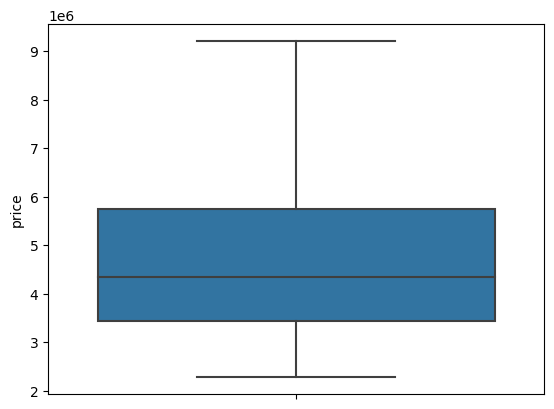

In [10]:
sns.boxplot(data=data, y='price')
plt.show()

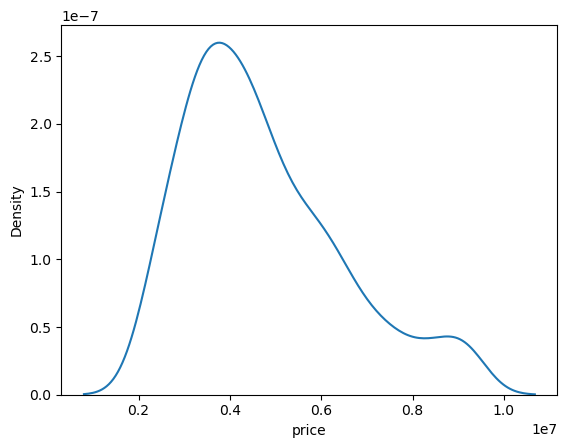

In [11]:
sns.kdeplot(data['price'])
plt.show()

In [12]:
data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,9205000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,9205000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9205000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,9205000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,9205000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,9205000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,9205000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,9205000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9205000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9205000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


### Feature Encoding

In [13]:
# Using One hot encoding to covert categorical columns into numerical
encoded_data=pd.get_dummies(data,dtype='int',drop_first=True)
encoded_data.columns = encoded_data.columns.str.replace("_yes","")
encoded_data.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,9205000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,9205000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,9205000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,9205000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,9205000,7420,4,1,2,2,1,1,1,0,1,0,0,0


In [14]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   parking                          545 non-null    int64
 6   mainroad                         545 non-null    int32
 7   guestroom                        545 non-null    int32
 8   basement                         545 non-null    int32
 9   hotwaterheating                  545 non-null    int32
 10  airconditioning                  545 non-null    int32
 11  prefarea                         545 non-null    int32
 12  furnishingstatus_semi-furnished  545 non-null    i

In [15]:
# First Split and then scale to prevent Data Leaking
train,test = train_test_split(encoded_data, test_size=0.3, random_state=42)
print(train.shape)
print(test.shape)

(381, 14)
(164, 14)


### Feature Scaling

In [16]:
# using min max scaler to scale the data
SS = StandardScaler()
cols  = ['area','bedrooms','bathrooms','stories','mainroad','parking','guestroom','basement','hotwaterheating', 'airconditioning','prefarea','furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']
train[cols] = SS.fit_transform(train[cols])
train.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
126,5880000,0.934301,0.055861,-0.553238,-0.907660,1.591603,0.397561,-0.478573,1.334549,-0.235376,-0.682191,1.798147,-0.86470,1.492921
363,3710000,-0.710246,-1.274325,-0.553238,-0.907660,-0.800511,0.397561,-0.478573,-0.749317,4.248529,-0.682191,-0.556128,1.15647,-0.669828
370,3640000,-0.390167,-1.274325,-0.553238,-0.907660,1.591603,0.397561,-0.478573,-0.749317,-0.235376,1.465865,-0.556128,1.15647,-0.669828
31,8400000,0.860719,0.055861,-0.553238,2.573733,1.591603,0.397561,-0.478573,-0.749317,-0.235376,1.465865,-0.556128,1.15647,-0.669828
113,6083000,2.065617,0.055861,-0.553238,-0.907660,1.591603,0.397561,-0.478573,1.334549,-0.235376,-0.682191,1.798147,-0.86470,-0.669828


<Axes: >

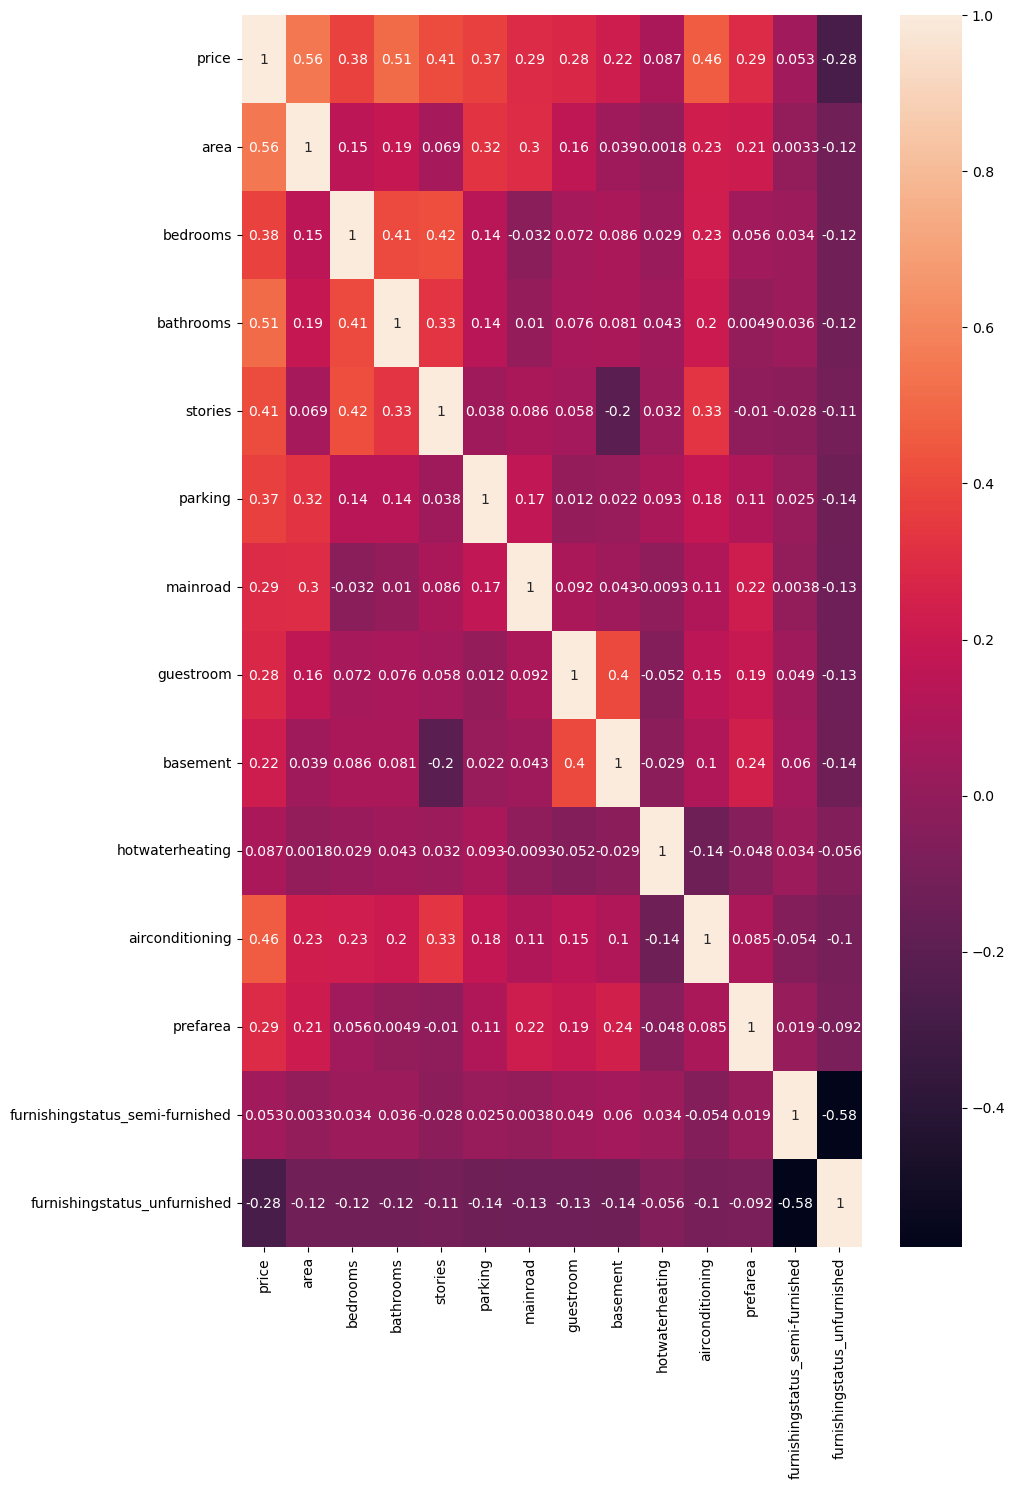

In [17]:
# Viewing correlation matrix
corr=train.corr(numeric_only=True)
plt.figure(figsize=(10,16))
sns.heatmap(corr, annot = True)

In [18]:
test[cols] = SS.transform(test[cols])
test.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
316,4060000,0.354846,1.386046,1.554599,0.252805,0.395546,-2.515338,-0.478573,1.334549,-0.235376,-0.682191,-0.556128,-0.86470,1.492921
77,6650000,0.630777,0.055861,1.554599,1.413269,-0.800511,0.397561,-0.478573,-0.749317,-0.235376,1.465865,1.798147,-0.86470,-0.669828
360,3710000,-0.500539,-1.274325,-0.553238,-0.907660,-0.800511,0.397561,-0.478573,-0.749317,-0.235376,-0.682191,-0.556128,1.15647,-0.669828
90,6440000,-0.059050,0.055861,-0.553238,0.252805,-0.800511,0.397561,-0.478573,-0.749317,-0.235376,1.465865,-0.556128,1.15647,-0.669828
493,2800000,-0.537330,0.055861,-0.553238,-0.907660,-0.800511,0.397561,-0.478573,-0.749317,-0.235376,-0.682191,-0.556128,-0.86470,-0.669828


In [19]:
# data preparation
x_train = train.drop(['price'], axis=1)
x_test = test.drop(['price'], axis=1)
print(x_train.shape)
print(x_test.shape)

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.
(381, 13)
(164, 13)


In [20]:
x_train.head()

,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
126,0.934301,0.055861,-0.553238,-0.907660,1.591603,0.397561,-0.478573,1.334549,-0.235376,-0.682191,1.798147,-0.86470,1.492921
363,-0.710246,-1.274325,-0.553238,-0.907660,-0.800511,0.397561,-0.478573,-0.749317,4.248529,-0.682191,-0.556128,1.15647,-0.669828
370,-0.390167,-1.274325,-0.553238,-0.907660,1.591603,0.397561,-0.478573,-0.749317,-0.235376,1.465865,-0.556128,1.15647,-0.669828
31,0.860719,0.055861,-0.553238,2.573733,1.591603,0.397561,-0.478573,-0.749317,-0.235376,1.465865,-0.556128,1.15647,-0.669828
113,2.065617,0.055861,-0.553238,-0.907660,1.591603,0.397561,-0.478573,1.334549,-0.235376,-0.682191,1.798147,-0.86470,-0.669828


In [21]:
x_test.head()

,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
316,0.354846,1.386046,1.554599,0.252805,0.395546,-2.515338,-0.478573,1.334549,-0.235376,-0.682191,-0.556128,-0.86470,1.492921
77,0.630777,0.055861,1.554599,1.413269,-0.800511,0.397561,-0.478573,-0.749317,-0.235376,1.465865,1.798147,-0.86470,-0.669828
360,-0.500539,-1.274325,-0.553238,-0.907660,-0.800511,0.397561,-0.478573,-0.749317,-0.235376,-0.682191,-0.556128,1.15647,-0.669828
90,-0.059050,0.055861,-0.553238,0.252805,-0.800511,0.397561,-0.478573,-0.749317,-0.235376,1.465865,-0.556128,1.15647,-0.669828
493,-0.537330,0.055861,-0.553238,-0.907660,-0.800511,0.397561,-0.478573,-0.749317,-0.235376,-0.682191,-0.556128,-0.86470,-0.669828


In [22]:
y_train = train['price']
y_test = test['price']
print(y_train.shape)
print(y_test.shape)

(381,)
(164,)


## Statsmodels' OLS

In [23]:
import statsmodels.api as sm

# add constant
lr_data = sm.add_constant(x_train)

# fit the data into the model
lr_model = sm.OLS(y_train, lr_data).fit()

In [24]:
lr_model.params

const                              4.736409e+06
area                               5.297738e+05
bedrooms                           5.920745e+04
bathrooms                          4.587436e+05
stories                            3.655676e+05
parking                            2.105163e+05
mainroad                           1.414088e+05
guestroom                          1.198721e+05
basement                           2.178344e+05
hotwaterheating                    1.490340e+05
airconditioning                    3.070737e+05
prefarea                           2.101780e+05
furnishingstatus_semi-furnished   -3.188763e+04
furnishingstatus_unfurnished      -1.598727e+05
dtype: float64

In [25]:
# model summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     64.68
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           1.74e-86
Time:                        15:44:43   Log-Likelihood:                -5771.6
No. Observations:                 381   AIC:                         1.157e+04
Df Residuals:                     367   BIC:                         1.163e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [26]:
# dropping "furnishingstatus_semi-furnished" as its statsiatically insignificant
x_train_1 = x_train.drop(['furnishingstatus_semi-furnished'], axis=1)

In [27]:
# add constant
lr_data_1 = sm.add_constant(x_train_1)

# fit the data into the model
lr_model_1 = sm.OLS(y_train, lr_data_1).fit()

print(lr_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     70.18
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           2.34e-87
Time:                        15:44:43   Log-Likelihood:                -5771.8
No. Observations:                 381   AIC:                         1.157e+04
Df Residuals:                     368   BIC:                         1.162e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [28]:
# VIF - Variable Inflation Factor
# vif > 5 is bad
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x_train_1.columns
vif['VIF'] = [variance_inflation_factor(x_train_1.values,i) for i in range(x_train_1.shape[1])]
vif['VIF'] = round(vif["VIF"], 2)
vif = vif.sort_values(by=['VIF'],ascending  = False)
vif

,Features,VIF
3,stories,1.56
7,basement,1.42
1,bedrooms,1.41
0,area,1.32
2,bathrooms,1.31
6,guestroom,1.27
9,airconditioning,1.27
4,parking,1.18
5,mainroad,1.18
10,prefarea,1.16


In [29]:
# removing bedroom as it has VIF > 5
x_train_2 = x_train_1.drop(['bedrooms'], axis=1)

In [30]:
# add constant
lr_data_2 = sm.add_constant(x_train_2)

# fit the data into the model
lr_model_2 = sm.OLS(y_train, lr_data_2).fit()

print(lr_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     76.45
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           4.41e-88
Time:                        15:44:44   Log-Likelihood:                -5772.3
No. Observations:                 381   AIC:                         1.157e+04
Df Residuals:                     369   BIC:                         1.162e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [31]:
vif = pd.DataFrame()
vif['Features'] = x_train_2.columns
vif['VIF'] = [variance_inflation_factor(x_train_2.values,i) for i in range(x_train_2.shape[1])]
vif['VIF'] = round(vif["VIF"], 2)
vif = vif.sort_values(by=['VIF'],ascending  = False)
vif

,Features,VIF
6,basement,1.39
2,stories,1.38
0,area,1.31
5,guestroom,1.27
8,airconditioning,1.27
1,bathrooms,1.22
3,parking,1.18
4,mainroad,1.16
9,prefarea,1.15
10,furnishingstatus_unfurnished,1.08


In [32]:
# residual analysis for train data
y_train_pred = lr_model_2.predict(lr_data_2)
res = y_train - y_train_pred

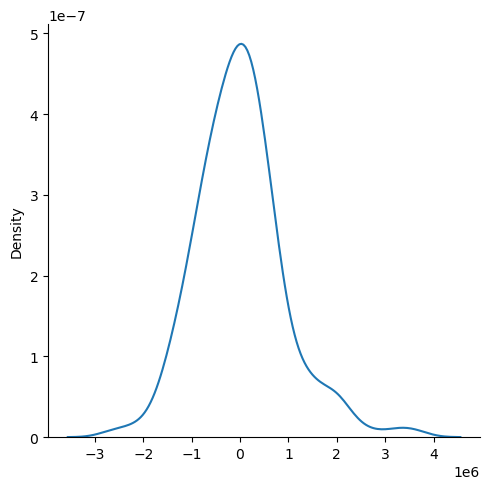

In [33]:
# residual plot
sns.displot(res, kind='kde')
plt.show()

In [34]:
x_test.shape

(164, 13)

In [35]:
# Removing the columns as per training data in Testing data
x_test = x_test.drop(['furnishingstatus_semi-furnished', 'bedrooms'], axis=1)

In [36]:
x_test.head()

,area,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus_unfurnished
316,0.354846,1.554599,0.252805,0.395546,-2.515338,-0.478573,1.334549,-0.235376,-0.682191,-0.556128,1.492921
77,0.630777,1.554599,1.413269,-0.800511,0.397561,-0.478573,-0.749317,-0.235376,1.465865,1.798147,-0.669828
360,-0.500539,-0.553238,-0.907660,-0.800511,0.397561,-0.478573,-0.749317,-0.235376,-0.682191,-0.556128,-0.669828
90,-0.059050,-0.553238,0.252805,-0.800511,0.397561,-0.478573,-0.749317,-0.235376,1.465865,-0.556128,-0.669828
493,-0.537330,-0.553238,-0.907660,-0.800511,0.397561,-0.478573,-0.749317,-0.235376,-0.682191,-0.556128,-0.669828


In [37]:
x_train_2.head()

,area,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus_unfurnished
126,0.934301,-0.553238,-0.907660,1.591603,0.397561,-0.478573,1.334549,-0.235376,-0.682191,1.798147,1.492921
363,-0.710246,-0.553238,-0.907660,-0.800511,0.397561,-0.478573,-0.749317,4.248529,-0.682191,-0.556128,-0.669828
370,-0.390167,-0.553238,-0.907660,1.591603,0.397561,-0.478573,-0.749317,-0.235376,1.465865,-0.556128,-0.669828
31,0.860719,-0.553238,2.573733,1.591603,0.397561,-0.478573,-0.749317,-0.235376,1.465865,-0.556128,-0.669828
113,2.065617,-0.553238,-0.907660,1.591603,0.397561,-0.478573,1.334549,-0.235376,-0.682191,1.798147,-0.669828


In [38]:
# Predicting using OLS method
lr_data_last = sm.add_constant(x_test)

y_pred_last = lr_model_2.predict(lr_data_last)

In [39]:
# residual analysis for test data
res = y_test - y_pred_last

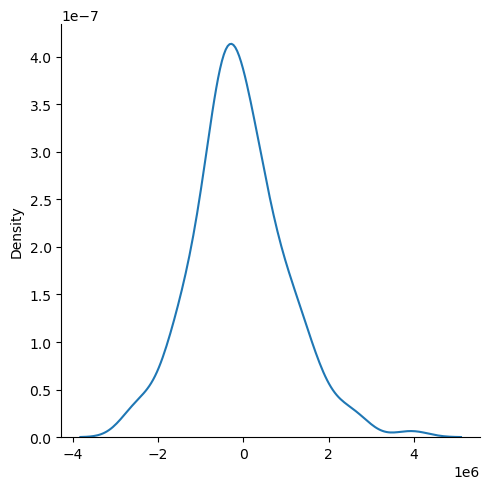

In [40]:
# residual plot
sns.displot(res, kind='kde')
plt.show()

## Linear Regression OLS method

In [41]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [42]:
model.fit(x_train_2,y_train)

LinearRegression()

In [43]:
model.intercept_

4736408.897637796

In [44]:
model.coef_

array([ 535192.85309183,  472947.06617955,  388752.62261543,
        215337.06534163,  136062.48793846,  117292.77598649,
        227032.3793406 ,  149558.61700446,  311294.61232284,
        212138.45118676, -142212.31564287])

In [45]:
y_pred_train = model.predict(x_train_2)
y_pred_train

array([ 5187189.20847503,  3797567.23549289,  4482054.08025579,
        6504919.7627706 ,  6100231.02289944,  6157735.38277351,
        3304378.16289928,  4706447.03152253,  8537167.76098774,
        5279129.49952834,  7042576.87444794,  7871005.71736209,
        3384498.58445849,  6894984.38904065,  5276008.24116106,
        4537246.49053091,  3559880.71405859,  4349479.44792592,
        6329454.66908831,  5609866.36989303,  5143038.52681015,
        4011014.17738366,  6515769.9473626 ,  3358918.83981927,
        3334486.38010551,  3099938.12859131,  8240911.25600282,
        5906202.61866837,  6289444.0946518 ,  4467031.40535303,
        4772114.30069321,  7209731.68206469,  5174307.45221589,
        4193193.92293393,  2931625.00421111,  7952704.58087567,
        4582981.80233922,  4997343.4829282 ,  5728409.41754315,
        5581506.68761886,  2740630.4942807 ,  5658149.32172882,
        3241655.8014583 ,  4754308.27053738,  6945339.89438375,
        5636059.06023417,  5934990.06658

In [46]:
y_pred_test = model.predict(x_test)
y_pred_test

array([5171774.34572281, 6911939.86063181, 3239194.53200043,
       4595288.14962855, 3219504.3763375 , 3591245.21891925,
       5525632.33039106, 6194803.14333032, 2897164.30039446,
       2513048.2048947 , 9387023.70202328, 2905535.54795773,
       3125206.44815562, 3535737.4919387 , 3838634.62673541,
       5180522.94694009, 3188229.0259208 , 4791400.96508519,
       4558908.68227359, 3721603.34574221, 5694340.38049181,
       5867095.37596004, 2835389.36840854, 4855002.4116027 ,
       5521160.2115444 , 7631943.18370352, 3472131.12622309,
       5205578.22812824, 8101177.2384885 , 3434355.97170742,
       6318594.07824449, 3413877.07487183, 6590665.76975677,
       4324104.88072605, 3563661.77268935, 5751288.3046848 ,
       5128918.43990013, 4312872.62591188, 3066135.98116683,
       4378826.46816643, 4724045.49331839, 3499391.2427865 ,
       6892249.70496888, 3987263.7041107 , 3906198.55508217,
       4311962.90299466, 6740577.55797687, 4095559.56025681,
       3918594.05681546,

### Training error

In [47]:
mae = mean_absolute_error(y_train,y_pred_train)

mse = mean_squared_error(y_train,y_pred_train)

r2 = r2_score(y_train,y_pred_train)

# Adjusted R-squared
n = x_train_2.shape[0]
k = x_train_2.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print(f" Mean Absolute Error:",mae)
print(f" Mean Square Error:",mse)
print(f" Root Mean Square Error:",np.sqrt(mse))
print(f" R2 Score:",r2)
print(f" Adjusted R2 Score:",adj_r2)

 Mean Absolute Error: 685451.2109020296
 Mean Square Error: 845290449681.773
 Root Mean Square Error: 919396.7857686761
 R2 Score: 0.6950371116607597
 Adjusted R2 Score: 0.6859460770490208


### Testing error

In [48]:
mae = mean_absolute_error(y_test,y_pred_test)

mse = mean_squared_error(y_test,y_pred_test)

r2 = r2_score(y_test,y_pred_test)

# Adjusted R-squared
n = x_train_2.shape[0]
k = x_train_2.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print(f" Mean Absolute Error:",mae)
print(f" Mean Square Error:",mse)
print(f" Root Mean Square Error:",np.sqrt(mse))
print(f" R2 Score:",r2)
print(f" Adjusted R2 Score:",adj_r2)

 Mean Absolute Error: 825500.5728814998
 Mean Square Error: 1151048429526.2332
 Root Mean Square Error: 1072869.2508997698
 R2 Score: 0.671921972657505
 Adjusted R2 Score: 0.6621418688613873


In [49]:
residuals = y_test - y_pred_test

In [50]:
# Durbin-Watson test
from statsmodels.stats.stattools import durbin_watson

# Calculate Durbin-Watson statistic
dw_stat = durbin_watson(residuals)
print("Durbin-Watson statistic:", dw_stat)

Durbin-Watson statistic: 2.131961682481148


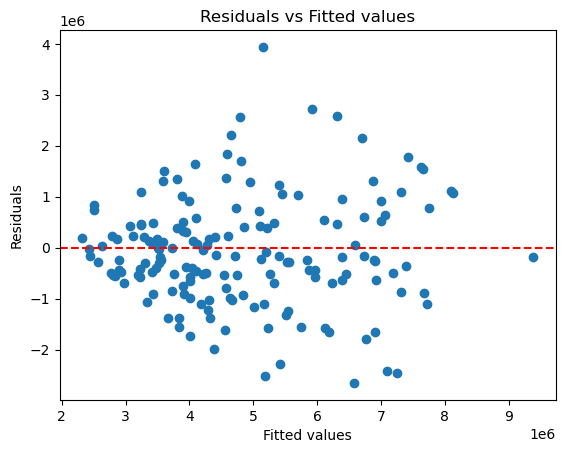

In [51]:
# Homoscedacity
plt.scatter(model.predict(x_test), residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

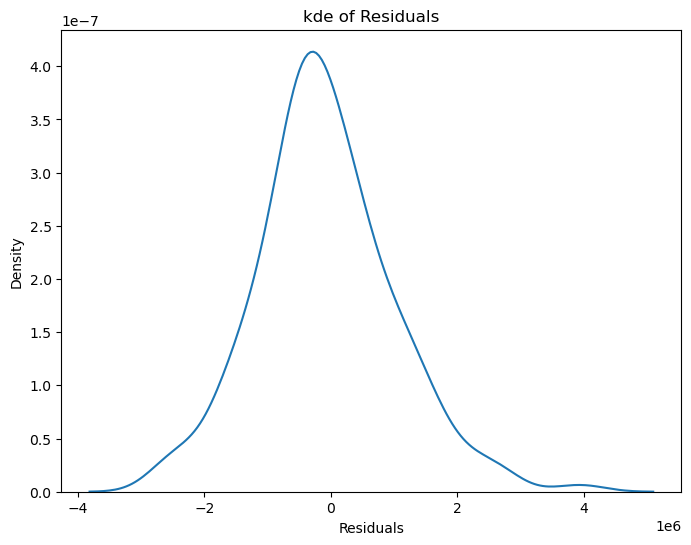

In [52]:
# Plot histogram of residuals
plt.figure(figsize=(8, 6))
sns.kdeplot(residuals)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('kde of Residuals')
plt.show()

## Linear Regression - Gradient Descent

In [53]:
from sklearn.linear_model import SGDRegressor

In [54]:
regressor = SGDRegressor()

In [55]:
regressor.fit(x_train_2,y_train)

SGDRegressor()

In [56]:
# Predict house price by using lm model with test dataset
y_pred_train = regressor.predict(x_train_2)
y_pred_test = regressor.predict(x_test)

### Training error

In [57]:
mae = mean_absolute_error(y_train,y_pred_train)

mse = mean_squared_error(y_train,y_pred_train)

r2 = r2_score(y_train,y_pred_train)

# Adjusted R-squared
n = x_train_2.shape[0]
k = x_train_2.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print(f" Mean Absolute Error:",mae)
print(f" Mean Square Error:",mse)
print(f" Root Mean Square Error:",np.sqrt(mse))
print(f" R2 Score:",r2)
print(f" Adjusted R2 Score:",adj_r2)

 Mean Absolute Error: 685244.6010521911
 Mean Square Error: 845339977535.8073
 Root Mean Square Error: 919423.7203465045
 R2 Score: 0.6950192430601796
 Adjusted R2 Score: 0.6859276757801307


### Testing error

In [58]:
mae = mean_absolute_error(y_test,y_pred_test)

mse = mean_squared_error(y_test,y_pred_test)

r2 = r2_score(y_test,y_pred_test)

# Adjusted R-squared
n = x_train_2.shape[0]
k = x_train_2.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print(f" Mean Absolute Error:",mae)
print(f" Mean Square Error:",mse)
print(f" Root Mean Square Error:",np.sqrt(mse))
print(f" R2 Score:",r2)
print(f" Adjusted R2 Score:",adj_r2)

 Mean Absolute Error: 824443.239560938
 Mean Square Error: 1149172016747.9033
 Root Mean Square Error: 1071994.4107820261
 R2 Score: 0.6724567979411363
 Adjusted R2 Score: 0.6626926374461566


In [59]:
residuals = y_test - y_pred_test

In [60]:
# Durbin-Watson test
from statsmodels.stats.stattools import durbin_watson

# Calculate Durbin-Watson statistic
dw_stat = durbin_watson(residuals)
print("Durbin-Watson statistic:", dw_stat)

Durbin-Watson statistic: 2.1359257580314344


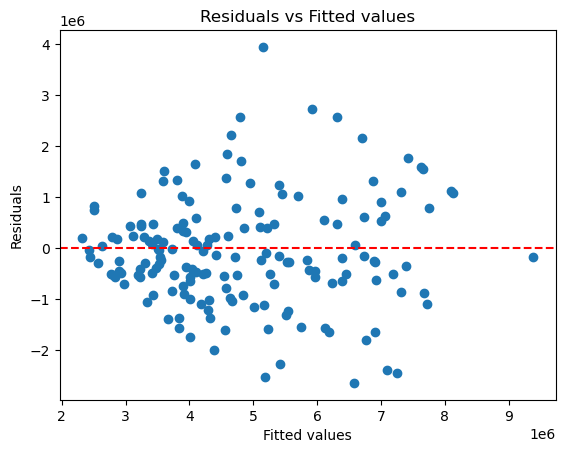

In [61]:
# Homoscedacity
plt.scatter(model.predict(x_test), residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

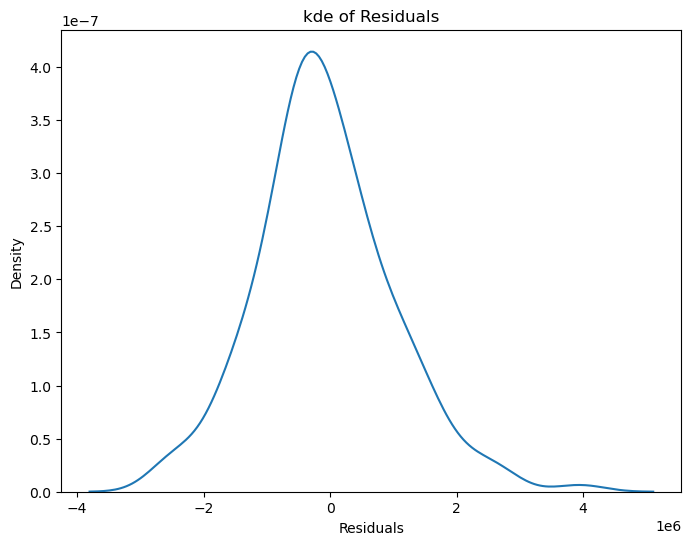

In [62]:
# Plot histogram of residuals
plt.figure(figsize=(8, 6))
sns.kdeplot(residuals)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('kde of Residuals')
plt.show()